In [2]:
%pylab nbagg
from tvb.simulator.lab import *

from __future__ import division, absolute_import
import numpy as np
import pandas as pd
import os
import json
import scipy
import scipy.io

import  csv
import math
import h5py

import matplotlib
from matplotlib import *
from matplotlib import pyplot as plt
# % matplotlib inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
############### SEEG #######################
import tvb.datatypes.region_mapping
from tvb.datatypes.cortex import Cortex
from tvb.datatypes.projections import ProjectionMatrix, ProjectionSurfaceEEG
from tvb.datatypes.surfaces import CorticalSurface

In [4]:
patient='id014_rb'
root_dir = os.getcwd()
project_dir = os.path.join(root_dir, "metadata/" + patient)
print project_dir

/Users/adam2392/Documents/tvb/metadata/id014_rb


In [5]:
con = connectivity.Connectivity.from_file(os.path.join(project_dir, "connectivity.zip"))
con.weights = con.weights - np.diag(np.diag(con.weights))
con.weights = con.weights/con.weights.max()

W = con.weights

con.configure()
con.summary_info

{'Areas - Maximum': 13963.01,
 'Areas - Mean': 3454.532380952382,
 'Areas - Minimum': 260.07999999999998,
 'Number of connections': 6072,
 'Number of regions': 84,
 'Tract lengths - Max. non zero (connections)': 196.851,
 'Tract lengths - Maximum': 196.851,
 'Tract lengths - Mean': 84.437243055555555,
 'Tract lengths - Mean non zero': 96.781869233268367,
 'Tract lengths - Mean non zero (connections)': 97.886971343873512,
 'Tract lengths - Min. non zero': 12.962,
 'Tract lengths - Min. non zero (connections)': 15.561,
 'Tract lengths - Var. non zero': 1977.7852954651937,
 'Tract lengths - Var. non zero (connections)': 1915.5522464856742,
 'Tract lengths - Variance': 2767.8629638778571,
 'Undirected': 1,
 'Weights - Maximum': 1.0,
 'Weights - Mean': 0.0063644117280919794,
 'Weights - Mean non zero': 0.0073957986089290204,
 'Weights - Min. non zero': 7.6111030771689745e-06,
 'Weights - Var. non zero': 0.00089653788122940605,
 'Weights - Variance': 0.00077807466038998631}

In [7]:
# convert seeg.xyz to seeg.txt file
sensorsfile = os.path.join(project_dir, "seeg.xyz")
newsensorsfile = os.path.join(project_dir, "seeg.txt")
try:
    os.rename(sensorsfile, newsensorsfile)
except:
    print "Already renamed seeg.xyz possibly!"
    
# convert gain_inv-square.mat file into gain_inv-square.txt file
gainmatfile = os.path.join(project_dir, "gain_inv-square.mat")
newgainmatfile = os.path.join(project_dir, "gain_inv-square.txt")
try:
    os.rename(gainmatfile, newgainmatfile)
except:
    print "Already renamed gain_inv-square.mat possibly!"

In [8]:
########## Internal sensors  ##################
sensor = sensors.SensorsInternal.from_file(source_file=os.path.join(project_dir, "seeg.txt"))

contacts = sensor.labels
seeg_xyz =  sensor.locations

print contacts.shape, '\n'
print seeg_xyz.shape

nsens = seeg_xyz.shape[0]

(165,) 

(165, 3)


In [12]:
cort_surf = surfaces.CorticalSurface.from_file(source_file=os.path.join(project_dir, "surface_cort.zip"))

cort_surf.configure()
cort_surf.summary_info

{'Edge lengths, longest (mm)': 9.048596736349454,
 'Edge lengths, mean (mm)': 0.9476404090010739,
 'Edge lengths, shortest (mm)': 0.019807841603769128,
 'Has two hemispheres': False,
 'Number of edges': 1027914,
 'Number of triangles': 685276,
 'Number of vertices': 342642,
 'Surface type': 'CorticalSurface',
 'Valid for simulations': False}

In [13]:
elect = []
dipole = []

for element in range(0,contacts.shape[0]):
    #print ffff[i1_s]
    kpm = np.array(re.match("([A-Z]+[a-z]*[']*)([0-9]+)", contacts[element]).groups())
    #print kpm[0]  
    #print kpm[1]  
    #print int(kpm[1])
    elect.append(kpm[0])
    dipole.append(int(kpm[1]))
    
#print contacts_separated

#print elect
#print dipole

find_0 = []
nbr_contacts = []
for element_1 in range(0, len(dipole)):
    if dipole[element_1] == 1:
        find_0.append(element_1)
    
#print find_0
##### find_0  ---> index of dipole equal to 0

##### N.B

###### Number of electrodes is : len(find_0)
###### Number of contacts per an electrode i is nbr_contacts[i+1]

for element_2 in range(0, 2):
    nbr_contacts.append(find_0[element_2+1]-find_0[element_2])

for element_3 in range(2, len(find_0)-1):
    nbr_contacts.append(find_0[element_3+1]-find_0[element_3])

nbr_contacts.append(len(contacts)- find_0[len(find_0)-1])
print "Nbre_contacts_per_electrode:", nbr_contacts

#########################################################
#########################################################

print "Nbre_electrodes:", len(nbr_contacts)

incr_cont = np.zeros((len(nbr_contacts)), int)
incr_cont[0] = 0

for element_4 in range(0, len(nbr_contacts)):
    incr_cont[element_4] = incr_cont[element_4-1] + nbr_contacts[element_4]

print "Ending Index of electrodes:", incr_cont # To plot each electrode with diff color

# print sum(nbr_contacts) # to be sure that the code is correct

Nbre_contacts_per_electrode: [15, 15, 15, 15, 15, 15, 15, 15, 15, 10, 10, 10]
Nbre_electrodes: 12
Ending Index of electrodes: [ 15  30  45  60  75  90 105 120 135 145 155 165]


In [ ]:
color_new = ['peru', 'dodgerblue', 'slategrey', 
             'skyblue', 'springgreen', 'fuchsia', 'limegreen', 
             'orangered',  'gold', 'crimson', 'teal', 'blueviolet', 'black', 'cyan', 'lightseagreen',
             'lightpink', 'red', 'indigo', 'mediumorchid', 'mediumspringgreen']

<IPython.core.display.Javascript object>


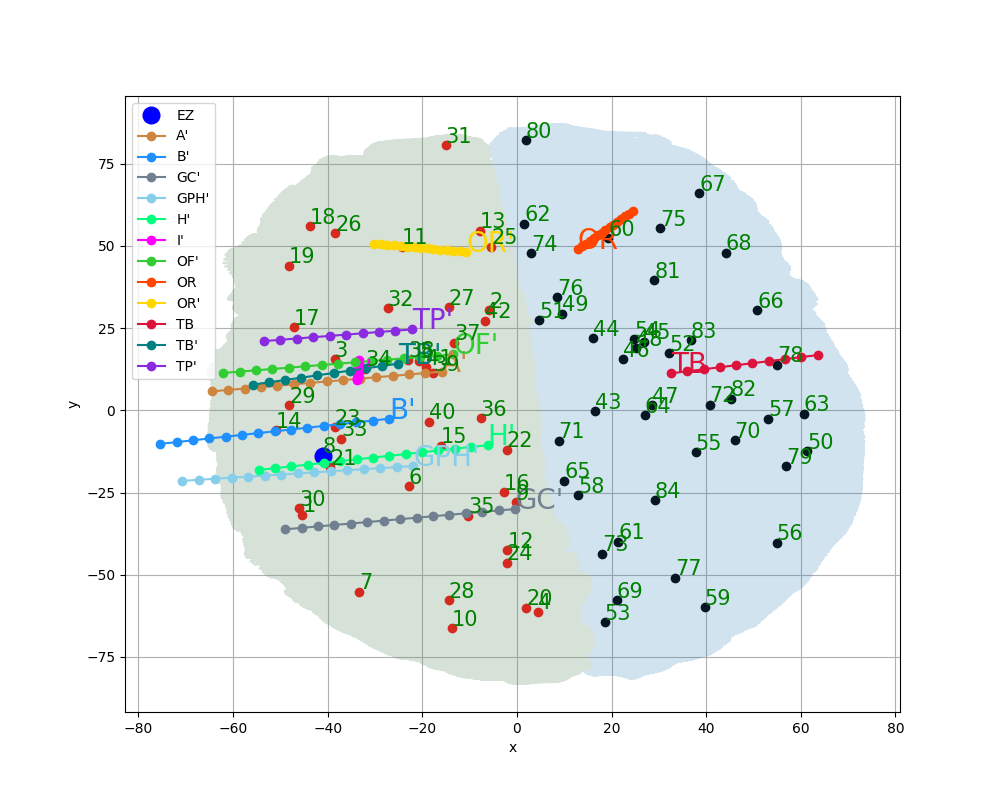

ctx-lh-inferiortemporal


In [42]:
############### TO PLOT EACH ELECTRODE WITH DIF. COLOR ####################
# fig = plt.figure(figsize=(17,14))
fig = plt.figure(figsize=(10, 8))

##############################    Region labels      #################################### 
xreg, yreg, zreg = con.centres.T # con.centres[:,0], con.centres[:,1], con.centres[:,2]

# divide the 84 parcellated regions into equal regions for left/right brain
# Labeled as red for Left Hemisphere
plot(xreg[:42] , yreg[:42], 'ro')
#and black for Right Hemisphere
plot(xreg[42:] , yreg[42:], 'ko')

#################################### Plot surface vertices  ###################################    
x_cort, y_cort, z_cort = cort_surf.vertices.T
plot(x_cort, y_cort, alpha=0.2) 

contourr = -4600
plot(x_cort[: contourr + len(x_cort)//2], y_cort[: contourr + len(x_cort)//2], 'gold', alpha=0.1) 

"""#################################### label regions PZ ###################################    

pz = array([34, 83, 7, 11, 54, 56])  # x0 = -2.25

# this array corresponds to PZ when x0 = -2.2, we delete regions found in pz, and rename that list, to make reference of regions in the plot 
reference = array([10, 13, 14, 28, 46, 33, 58, 60, 62, 63 ])  

for i in range(pz.shape[0]):
    fr = pz[i]
    plot(xreg[fr] , yreg[fr], 'salmon', marker = 'o', markersize=13)
    text(xreg[fr] , yreg[fr] + 0.7, str(fr+1), color = 'g', fontsize = 15)

plot(xreg[fr] , yreg[fr], 'salmon', marker = 'o', markersize=13, label="PZ")

del (i, fr)
for i in range(reference.shape[0]):
    fr = reference[i]
    text(xreg[fr] , yreg[fr] + 0.7, str(fr+1), color = 'g', fontsize = 15)


#################################  (END) label regions PZ ###################################    
"""
#################################### label regions EZ ###################################    
V = []
ezindex = 7
U = np.array([ezindex])
print con.region_labels[ezindex]

# plot(xreg[U] , yreg[U], 'bo', markersize=12)  ### EZ
plot(xreg[U[0]] , yreg[U[0]], 'bo', markersize=12, label="EZ")  ### EZ


"""for k in range(U.shape[0]):
    u = 1 + U[k]
    #print type(np.array_str(np.array([u])))
    V.append( np.array_str(np.array(u)) )
#print V

for k in range(U.shape[0]):
    rs = U[k]
    #print rs
    text(xreg[rs] , yreg[rs] + 0.7, V[k] , color = 'g', fontsize = 15)
"""    

#################################### Elecrodes Implantation  ###################################    
nCols_new = len(nbr_contacts)

# SEEG location as red 
xs, ys, zs = seeg_xyz.T # SEEG coordinates --------> (RB)'s electrodes concatenated


ii = 0
plot(xs[:incr_cont[ii]], ys[:incr_cont[ii]], 
          color_new[ii] , marker = 'o', label= elect[ii])

plt.text(xs[0], ys[0],  str(elect[ii]), color = color_new[ii], fontsize = 20)

    
for ii in range(1,nCols_new):
    plt.plot(xs[incr_cont[ii-1]:incr_cont[ii]], ys[incr_cont[ii-1]:incr_cont[ii]], 
         color_new[ii] , marker = 'o', label= elect[incr_cont[ii-1]])
    plt.text(xs[incr_cont[ii-1]], ys[incr_cont[ii-1]],  str(elect[incr_cont[ii-1]]), color = color_new[ii], fontsize = 20)

"""er = 59   # ctx-rh-lateralorbitofrontal
text(xreg[er] , yreg[er] + 0.7, str(er+1), color = 'g', fontsize = 15)

er = 43   # Right-Caudate
text(xreg[er] , yreg[er] + 0.7, str(er+1), color = 'g', fontsize = 15)

er = 75  # ctx-rh-superiorfrontal
text(xreg[er] , yreg[er] + 0.7, str(er+1), color = 'g', fontsize = 15)

er = 48   # Right-Accumbens-area
text(xreg[er] , yreg[er] + 0.7, str(er+1), color = 'g', fontsize = 15)

er = 50  # ctx-rh-caudalanteriorcingulate
text(xreg[er] , yreg[er] + 0.7, str(er+1), color = 'g', fontsize = 15)



#Insula
er = 33
text(xreg[er] , yreg[er] + 0.7, str(er+1), color = 'g', fontsize = 15)

er = 82
text(xreg[er] , yreg[er] + 0.7, str(er+1), color = 'g', fontsize = 15)
#End Insula


# Temporal Pole
er = 31
text(xreg[er] , yreg[er] + 0.7, str(er+1), color = 'g', fontsize = 15)

er = 80
text(xreg[er] , yreg[er] + 0.7, str(er+1), color = 'g', fontsize = 15)
#End Insula

# Parahippocampal gyrus
er = 14
text(xreg[er] , yreg[er] + 0.7, str(er+1), color = 'g', fontsize = 15)

er = 63
text(xreg[er] , yreg[er] + 0.7, str(er+1), color = 'g', fontsize = 15)
#End Insula"""

for er in range(84):
    plt.text(xreg[er] , yreg[er] + 0.7, str(er+1), color = 'g', fontsize = 15)

xlabel('x')
ylabel('y')

plt.grid(True)
plt.legend()

plt.show()

In [28]:
x_cort, y_cort, z_cort = cort_surf.vertices.T
print x_cort.shape
print contourr+len(x_cort)//2
print xs[0]
print ys[0]
print str(elect[ii])
print color_new[ii]

(342642,)
166721
-15.88
11.76
A'
peru
